In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_long_salary_17-18')

In [3]:
rbs.dtypes

NAME          object
LONG           int64
LONG_rank    float64
salary         int64
dtype: object

In [4]:
rbs.head()

,NAME,LONG,LONG_rank,salary
0,Leonard Fournette,90,1.0,6787711
1,Melvin Gordon,87,2.0,2667443
2,Bilal Powell,75,4.5,3750000
3,DeMarco Murray,75,4.5,6312500
4,Derrick Henry,75,4.5,1351982


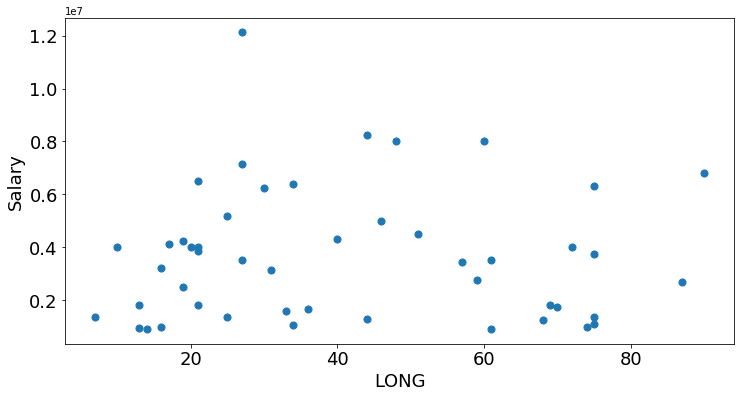

In [5]:
ax = rbs.plot(kind="scatter", x = 'LONG',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('LONG', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(rbs.loc[:, ['LONG', 'salary']])

In [7]:
X.mean(axis = 0)

array([-1.20274161e-16, -7.40148683e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 1.3331512 , -0.88310237],
       [-0.80219149,  0.12452795],
       [-0.20674537,  1.69636616],
       [ 1.02243904,  0.32419385],
       [-0.7824243 , -0.89947187]])

In [11]:
km.predict(X)

array([3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 2, 3, 3, 3, 2, 3, 4, 2, 1,
       4, 2, 4, 4, 1, 2, 2, 2, 1, 4, 1, 4, 2, 1, 1, 1, 1, 4, 1, 4, 1, 4,
       4, 4, 1, 4], dtype=int32)

In [12]:
rbs['clusters'] = km.labels_
rbs.head()

,NAME,LONG,LONG_rank,salary,clusters
0,Leonard Fournette,90,1.0,6787711,3
1,Melvin Gordon,87,2.0,2667443,0
2,Bilal Powell,75,4.5,3750000,3
3,DeMarco Murray,75,4.5,6312500,3
4,Derrick Henry,75,4.5,1351982,0


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[7.23750000e+01, 1.47516100e+06],
       [2.24545455e+01, 3.95851455e+06],
       [3.63750000e+01, 7.83238562e+06],
       [6.51111111e+01, 4.45060078e+06],
       [2.29166667e+01, 1.43481758e+06]])

In [14]:
rbs.groupby('clusters')[['LONG', 'salary']].mean()

,LONG,salary
clusters,,
0,72.375000,1.475161e+06
1,22.454545,3.958515e+06
2,36.375000,7.832386e+06
3,65.111111,4.450601e+06
4,22.916667,1.434818e+06


In [15]:
centroids = rbs.groupby('clusters')[['LONG', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

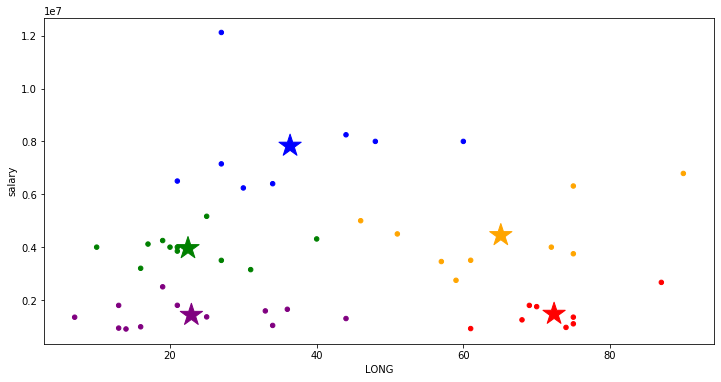

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
rbs['color'] = rbs['clusters'].map(lambda p: colors[p])

ax = rbs.plot(    
    kind = 'scatter', 
    x = 'LONG', y = 'salary',
    figsize = (12,6),
    c = rbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'LONG', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

17.521089610675926

In [18]:
silhouette_score(X, km.labels_)

0.4094695817527303